In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")
from collections import Counter

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("credit_dataset.csv")

In [3]:
data

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


In [4]:
data.describe(include='all')

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134,25134,25134,25134.000000,2.513400e+04,25134,25134,25134,25134,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
unique,NaN,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,15630,14618,16461,NaN,NaN,15622,16808,17509,22102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12566.500000,5.078838e+06,NaN,NaN,NaN,0.512334,1.948339e+05,NaN,NaN,NaN,NaN,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,7255.705169,4.194102e+04,NaN,NaN,NaN,0.787785,1.045110e+05,NaN,NaN,NaN,NaN,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,5.008806e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,6283.250000,5.042228e+06,NaN,NaN,NaN,0.000000,1.350000e+05,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,12566.500000,5.079004e+06,NaN,NaN,NaN,0.000000,1.800000e+05,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,18849.750000,5.115604e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [6]:
data.nunique()

Unnamed: 0        25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

#### Calculating count of Fraud vs No Fraud cases

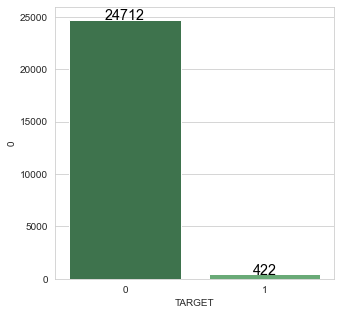

In [7]:
plt.figure(figsize=(5,5))
target_group = data.groupby('TARGET').size().reset_index()
pal = sns.color_palette("Greens_d", len(target_group))
rank = target_group["TARGET"].argsort().argsort()
g = sns.barplot(x = target_group['TARGET'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['TARGET'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [8]:
#checking for NULL VALUES in dataset
data.isna().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

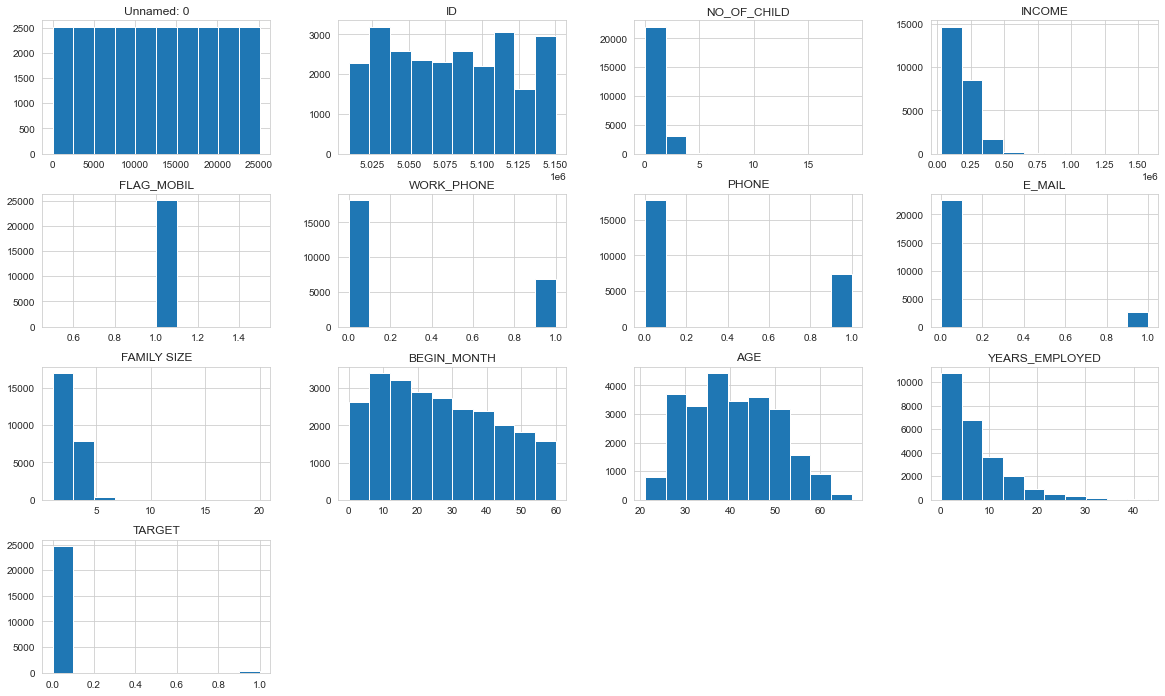

In [9]:
#Distribution of continuous 
data.hist(figsize=(20,12))
plt.show()

In [10]:
data.drop(columns={"ID"},inplace=True,axis=1)

In [11]:
data.drop(columns={"Unnamed: 0"},inplace=True,axis=1)

In [12]:
#all the categorical columns with their values -
cols=data.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(data[i].unique())
    print("")

Distinct_values :
 'column_name' = GENDER
['M' 'F']

Distinct_values :
 'column_name' = CAR
['Y' 'N']

Distinct_values :
 'column_name' = REALITY
['Y' 'N']

Distinct_values :
 'column_name' = INCOME_TYPE
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Distinct_values :
 'column_name' = EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Distinct_values :
 'column_name' = FAMILY_TYPE
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Distinct_values :
 'column_name' = HOUSE_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



In [13]:
#Detecting Outliers
#these columns have continuous values other are having discrete entries
cont=data[["INCOME","BEGIN_MONTH","AGE","YEARS_EMPLOYED"]]

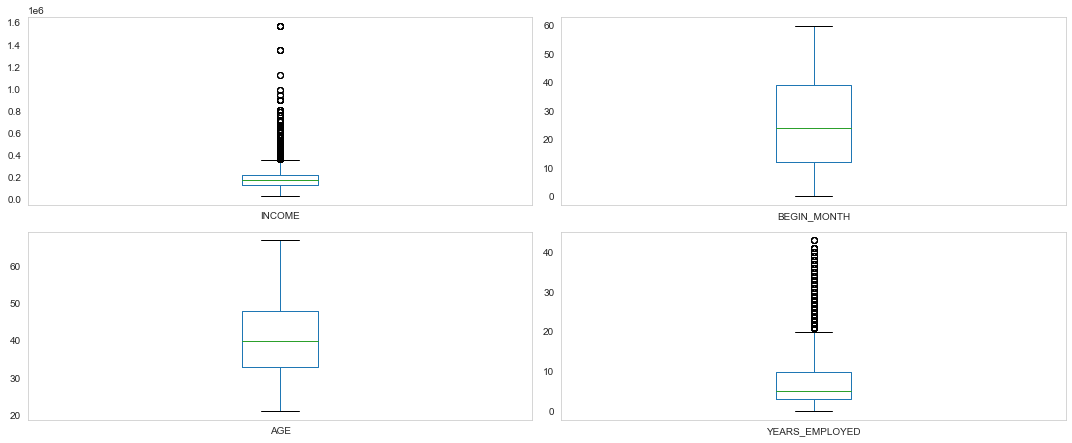

In [14]:
#Using Boxplot to detect the outliers-
plt.figure(figsize=(15,12))

for i ,col in enumerate(list(cont.columns)):
    plt.subplot(4,2,i+1)
    cont.boxplot(col)
    plt.grid()
    plt.tight_layout()

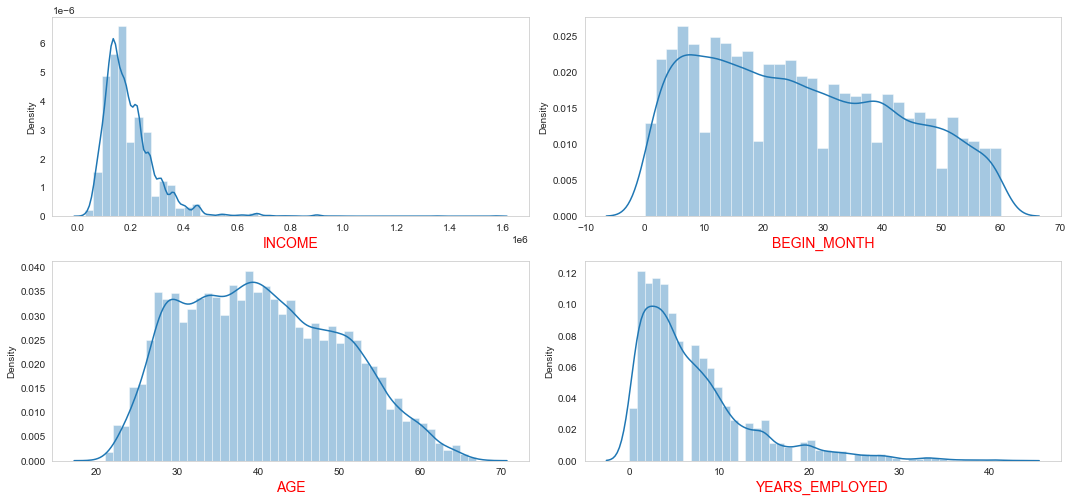

In [15]:
# Distribution of columns those have continuous -
#Histogram
plt.figure(figsize=(15,10))

for i ,cols in enumerate(list(cont.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(cont[cols])
    plt.xlabel(cols,fontsize=14,color="Red")
    plt.grid()
    plt.tight_layout()

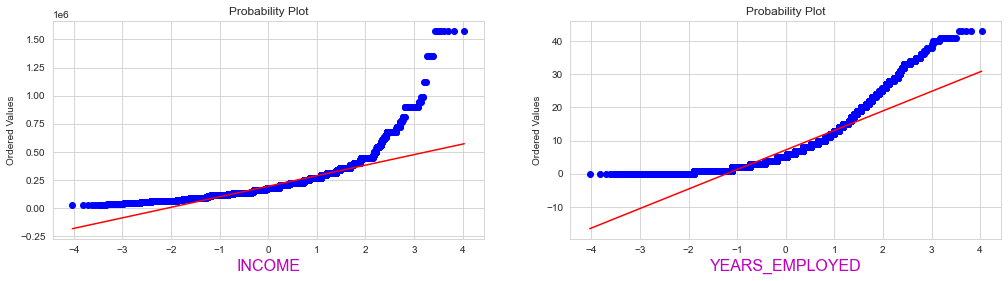

In [16]:
#income and years_employed have outliers
plt.figure(figsize=(17,4))

plt.subplot(121)
res=stats.probplot(data.INCOME,plot=plt,dist="norm")
plt.xlabel("INCOME",fontsize=16,color="m")

plt.subplot(122)
res=stats.probplot(data.YEARS_EMPLOYED,plot=plt,dist="norm")
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")

plt.show()

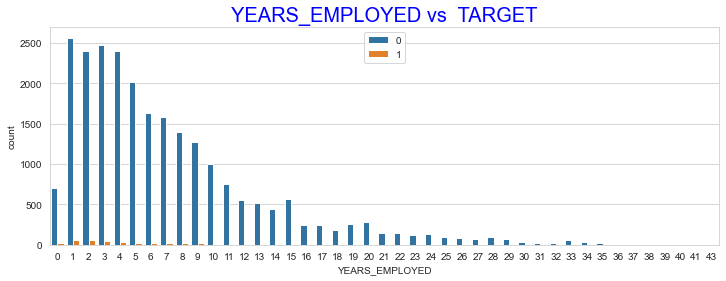

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(data["YEARS_EMPLOYED"],hue="TARGET",data=data)
plt.title("YEARS_EMPLOYED vs  TARGET",fontsize=20,color="BLUE")
plt.legend()
plt.show()

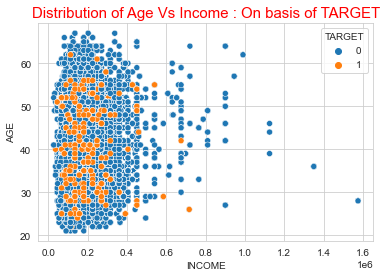

In [10]:
sns.scatterplot(data["INCOME"],data["AGE"],hue=data["TARGET"])
plt.title("Distribution of Age Vs Income : On basis of TARGET",fontsize=15,color="Red")
plt.show()

In [11]:
#removing values those are greater then 600000
data=data[data['INCOME'] < 600000]

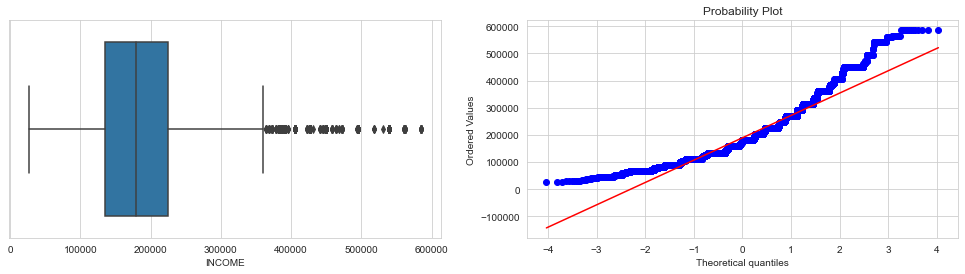

In [12]:
plt.figure(figsize=(17,4))

plt.subplot(121)
sns.boxplot(data.INCOME)

plt.subplot(122)
res=stats.probplot(data.INCOME,plot=plt,dist="norm")

In [13]:
#Dropping the values greater the 20
data=data[data['YEARS_EMPLOYED'] < 20]

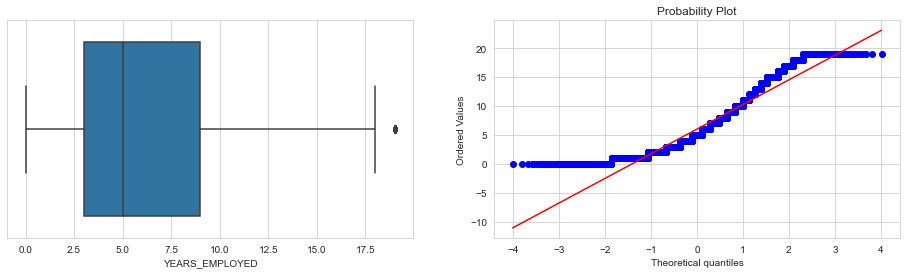

In [14]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(data.YEARS_EMPLOYED)
plt.subplot(122)
res=stats.probplot(data.YEARS_EMPLOYED,plot=plt,dist="norm")

In [15]:
#everyone has phone 
data.drop("FLAG_MOBIL",inplace=True,axis=1)

In [16]:
#converting float data types to INT64 datatype
floats=["INCOME","FAMILY SIZE","BEGIN_MONTH"]

for i in floats:
    data[i]=data[i].astype("int64")

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
labels=["GENDER","CAR","REALITY","INCOME_TYPE","EDUCATION_TYPE","HOUSE_TYPE","FAMILY_TYPE"]
label=LabelEncoder()

for i in labels:
    data[i]=label.fit_transform(data[i])

In [19]:
#dataset after using LabelEncoder
data

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,1,1,1,0,112500,4,4,1,1,0,0,0,2,29,59,3,0
1,1,5008808,0,0,1,0,270000,0,4,3,1,0,1,1,1,4,52,8,0
2,2,5008809,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
3,3,5008810,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
4,4,5008811,0,0,1,0,270000,0,4,3,1,0,1,1,1,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,1,1,1,0,315000,4,4,1,1,0,0,0,2,11,48,7,1
25130,25130,5149834,0,0,1,0,157500,0,1,1,1,0,1,1,2,23,34,4,1
25131,25131,5149838,0,0,1,0,157500,1,1,1,1,0,1,1,2,32,34,4,1
25132,25132,5150049,0,0,1,0,283500,4,4,1,1,0,0,0,2,9,49,2,1


In [20]:
#corr of the 
data.corr()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
Unnamed: 0,1.000000,0.937911,0.012431,-0.032663,-0.099639,0.038721,-0.019835,0.025976,-0.008697,0.010353,0.010788,0.092292,0.013909,-0.069763,0.032133,0.000425,-0.040186,-0.027076,0.145188
ID,0.937911,1.000000,0.000281,-0.033352,-0.088051,0.033138,-0.021461,0.018995,-0.009009,0.015677,0.013362,0.091968,0.017026,-0.067779,0.024611,-0.001008,-0.038051,-0.020292,0.019073
GENDER,0.012431,0.000281,1.000000,0.335480,-0.038093,0.007133,0.215555,0.054693,0.049496,-0.048857,0.050642,0.016151,-0.022394,-0.029970,0.033294,-0.004875,-0.088454,-0.074834,0.018699
CAR,-0.032663,-0.033352,0.335480,1.000000,0.010930,0.060831,0.213636,0.001591,-0.072167,-0.098587,0.005645,-0.024479,-0.025668,0.001649,0.104713,0.026117,-0.052365,-0.002096,-0.003231
REALITY,-0.099639,-0.088051,-0.038093,0.010930,1.000000,0.021140,0.030626,-0.029387,0.008892,0.001889,-0.176601,-0.207793,-0.060026,0.062439,0.021296,-0.011152,0.089129,-0.008422,-0.022924
NO_OF_CHILD,0.038721,0.033138,0.007133,0.060831,0.021140,1.000000,-0.034394,0.041044,-0.024205,-0.161934,0.004803,-0.000719,-0.013026,-0.016472,0.905458,0.006449,-0.238263,0.015776,-0.003085
INCOME,-0.019835,-0.021461,0.215555,0.213636,0.030626,-0.034394,1.000000,-0.151565,-0.201597,0.036170,-0.007361,-0.098489,0.006639,0.068385,-0.045235,0.031696,0.053488,0.044452,0.011164
INCOME_TYPE,0.025976,0.018995,0.054693,0.001591,-0.029387,0.041044,-0.151565,1.000000,0.105883,-0.012714,-0.008985,0.079314,0.002694,-0.042644,0.043303,-0.005473,0.001142,0.024137,-0.001414
EDUCATION_TYPE,-0.008697,-0.009009,0.049496,-0.072167,0.008892,-0.024205,-0.201597,0.105883,1.000000,-0.001881,-0.029707,0.007729,-0.054091,-0.105592,-0.019444,-0.013024,0.144156,0.020961,-0.010094
FAMILY_TYPE,0.010353,0.015677,-0.048857,-0.098587,0.001889,-0.161934,0.036170,-0.012714,-0.001881,1.000000,0.040743,-0.048622,-0.026204,-0.013375,-0.520295,-0.042932,0.011540,-0.033102,0.022860


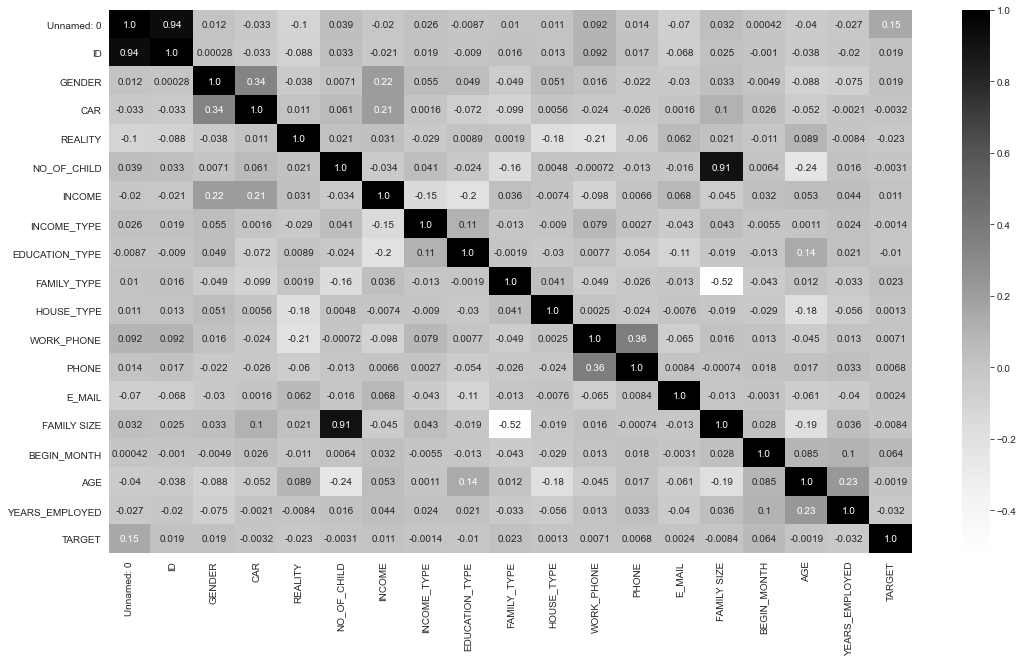

In [21]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt='.2',cmap="Greys")
plt.show()

In [22]:
#FAMILY_SIZE and NO_OF_CHILD are highly correlated to each other so we can drop one feature form the dataset
data.drop('NO_OF_CHILD',inplace=True,axis=1)

# Feature Selection

In [23]:
from sklearn.tree import ExtraTreeClassifier

In [24]:
X=data.drop("TARGET",axis=1)
y=data.TARGET

In [25]:
print("X :",X.shape)
print("y :",y.shape)

X : (23361, 17)
y : (23361,)


In [26]:
model=ExtraTreeClassifier()
model.fit(X,y)

ExtraTreeClassifier()

In [27]:
print(model.feature_importances_)

[0.26036293 0.25227098 0.02228568 0.0283574  0.01015537 0.06049795
 0.02748657 0.02034981 0.01310291 0.0141162  0.03458038 0.0131086
 0.01105895 0.03910362 0.07824986 0.06164719 0.05326561]


In [28]:
feat=pd.Series(model.feature_importances_,index=X.columns)

In [29]:
feats=feat.to_frame().reset_index()
feats.columns=["Features","Scores"]
features=feats.sort_values(by="Scores",ascending=False)
top_features=features.nlargest(12,"Scores")
top_features

,Features,Scores
0,Unnamed: 0,0.260363
1,ID,0.252271
14,BEGIN_MONTH,0.078250
15,AGE,0.061647
5,INCOME,0.060498
16,YEARS_EMPLOYED,0.053266
13,FAMILY SIZE,0.039104
10,WORK_PHONE,0.034580
3,CAR,0.028357
6,INCOME_TYPE,0.027487


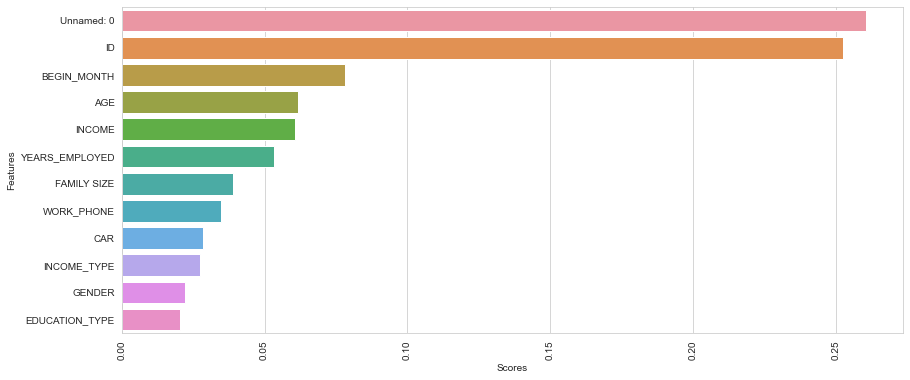

In [30]:
plt.figure(figsize=(14,6))
sns.barplot(y="Features",x="Scores",data=top_features)
plt.xticks(rotation=90)
plt.show()

In [31]:
new_data=data[["REALITY","BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","CAR"
                  ,"E_MAIL","HOUSE_TYPE","EDUCATION_TYPE","TARGET"]]

In [32]:
new_data.shape

(23361, 13)

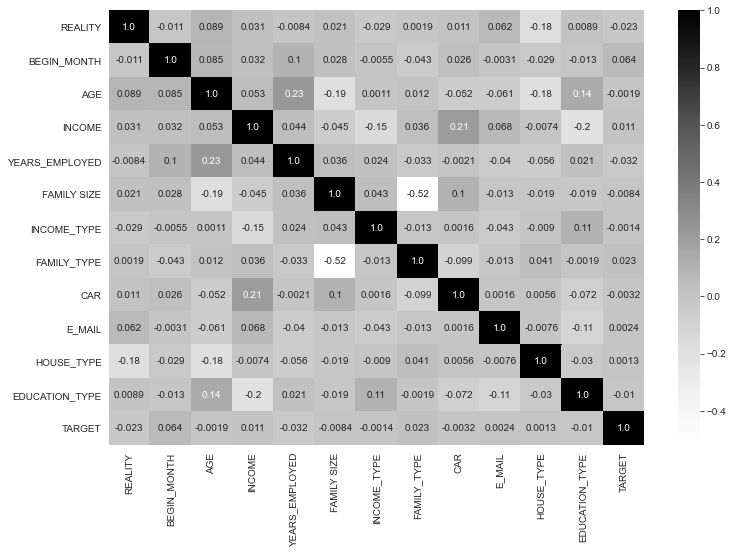

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(new_data.corr(),fmt='.2',annot=True,cmap="Greys")
plt.show()

In [34]:
new_data.head()

,REALITY,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,FAMILY SIZE,INCOME_TYPE,FAMILY_TYPE,CAR,E_MAIL,HOUSE_TYPE,EDUCATION_TYPE,TARGET
0,1,29,59,112500,3,2,4,1,1,0,1,4,0
1,1,4,52,270000,8,1,0,3,0,1,1,4,0
2,1,26,52,270000,8,1,0,3,0,1,1,4,0
3,1,26,52,270000,8,1,0,3,0,1,1,4,0
4,1,38,52,270000,8,1,0,3,0,1,1,4,0


# Dummy Variables

In [35]:
dummy_data=pd.get_dummies(new_data,columns={"REALITY","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","E_MAIL","CAR",
                                            "HOUSE_TYPE","EDUCATION_TYPE"},drop_first=True)

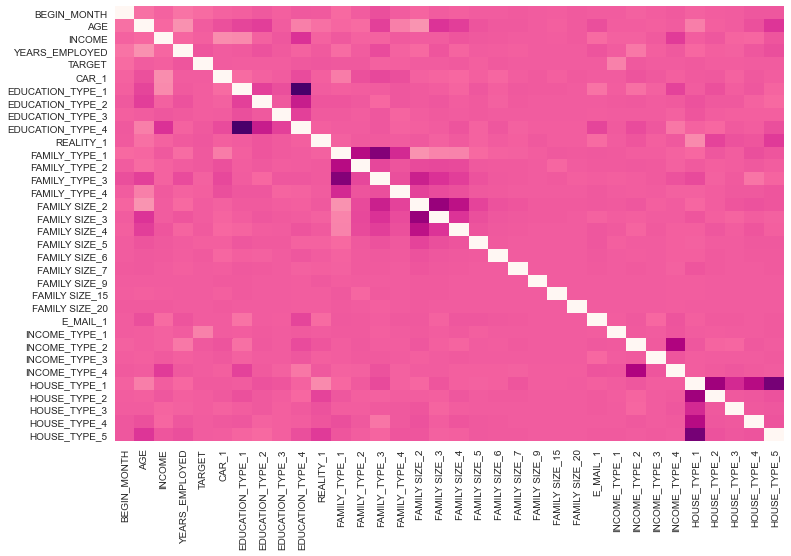

In [36]:
#checking the correlation of the new dataset
plt.figure(figsize=(12,8))
sns.heatmap(dummy_data.corr(),fmt='.2',cbar=False,cmap="RdPu_r")
plt.show()

In [37]:
dummy_data.head()

,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,TARGET,CAR_1,EDUCATION_TYPE_1,EDUCATION_TYPE_2,EDUCATION_TYPE_3,EDUCATION_TYPE_4,...,E_MAIL_1,INCOME_TYPE_1,INCOME_TYPE_2,INCOME_TYPE_3,INCOME_TYPE_4,HOUSE_TYPE_1,HOUSE_TYPE_2,HOUSE_TYPE_3,HOUSE_TYPE_4,HOUSE_TYPE_5
0,29,59,112500,3,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,4,52,270000,8,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,26,52,270000,8,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,26,52,270000,8,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,38,52,270000,8,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [38]:
dummy_data.shape

(23361, 34)

In [39]:
da=dummy_data.copy()

In [40]:
#data_minority=da[data["TARGET"] == 1]
#data_majority=da[data["TARGET"] == 0]

In [41]:
#print("Data_majority :",data_majority.shape)
#print("Data_minority :",data_minority.shape)

# TRAIN TEST SPLIT

In [42]:
x = da.drop(['TARGET'], axis=1)
y = da['TARGET']
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [43]:
y_train.shape, y_test.shape

((18688,), (4673,))

In [44]:
y_train.value_counts()/len(y_train)

0    0.982716
1    0.017284
Name: TARGET, dtype: float64

In [45]:
    y_test.value_counts()/len(y_test)

0    0.982666
1    0.017334
Name: TARGET, dtype: float64

In [46]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

# Resampling techniques to handel class imbalance

## 1. Oversampling

## a) Random Oversampling

In [58]:
from imblearn.over_sampling import RandomOverSampler

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using Random Over Sampling
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

counter = Counter(y_train_ros)
print('After',counter)

Before Counter({0: 18365, 1: 323})
After Counter({0: 18365, 1: 18365})


## b) SMOTE

In [51]:
#K Means SMOTE
#library for perfroming SMOTE
from imblearn.over_sampling import SMOTE

In [52]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 18365, 1: 323})
After Counter({0: 18365, 1: 18365})


## c) ADASYN

In [53]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 18365, 1: 323})
After Counter({1: 18435, 0: 18365})


## 2. Undersampling

## a) Random Undersampling

In [54]:
from imblearn.under_sampling import RandomUnderSampler

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using Random Under Sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

counter = Counter(y_train_rus)
print('After',counter)

Before Counter({0: 18365, 1: 323})
After Counter({0: 323, 1: 323})


## b) Tomek Links

In [55]:
from imblearn.under_sampling import TomekLinks

counter = Counter(y_train)
print('Before',counter)
# undersampling the train dataset using TomekLinks
toml = TomekLinks()
X_train_toml, y_train_toml = toml.fit_resample(X_train, y_train)

counter = Counter(y_train_toml)
print('After',counter)

Before Counter({0: 18365, 1: 323})
After Counter({0: 18268, 1: 323})


## c) Near Miss

In [56]:
from imblearn.under_sampling import NearMiss

counter = Counter(y_train)
print('Before',counter)
# undersampling the train dataset using Near Miss
nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

counter = Counter(y_train_nm)
print('After',counter)

Before Counter({0: 18365, 1: 323})
After Counter({0: 323, 1: 323})


## 3. Hybrid Techniques

## a) SMOTE + Tomek Links

In [57]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 18365, 1: 323})
After Counter({0: 18340, 1: 18340})


## b) SMOTE + ENN

In [59]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 18365, 1: 323})
After Counter({1: 17999, 0: 17123})


# Visualizing Resampled Data

In [60]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=20000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=2,
                            n_clusters_per_class=1,
                            weights=[0.95, 0.05],
                            class_sep=0.8, random_state=100)
X1, X2 = list(), list()
for i, j in enumerate(X):
    X1.append(j[0])
    X2.append(j[1])
df = pd.DataFrame({'X1':X1, 'X2':X2, 'Y':Y})
pal = sns.color_palette('tab10')
print(pal.as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


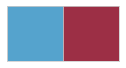

In [61]:
#sns.set_palette('icefire')
sns.set_palette(['#55a3cd', '#9c2f45'])
sns.palplot(sns.color_palette())

# Imbalanced Data

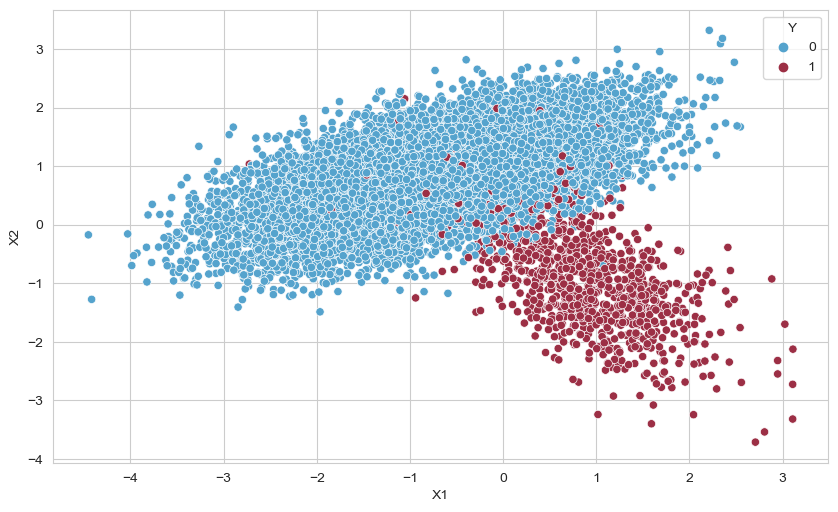

In [62]:
plt.figure(figsize=(10,6),dpi=100)

sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df)
plt.show()

In [63]:
df['Y'].value_counts()

0    18909
1     1091
Name: Y, dtype: int64

In [64]:
x = df.drop('Y', axis=1)
y = df['Y']

# With Resampling Techniques

In [65]:
counter = Counter(y)
ros = RandomOverSampler()
X_train1, y_train1 = ros.fit_resample(x, y)
counter = Counter(y_train1)
df_ros = X_train1.copy()
df_ros['Y'] = y_train1

counter = Counter(y)
smt = SMOTE()
X_train1, y_train1 = smt.fit_resample(x, y)
counter = Counter(y_train1)
df_sm = X_train1.copy()
df_sm['Y'] = y_train1

counter = Counter(y)
ada = ADASYN()
X_train1, y_train1 = ada.fit_resample(x, y)
counter = Counter(y_train1)
df_ada = X_train1.copy()
df_ada['Y'] = y_train1

counter = Counter(y)
rus = RandomUnderSampler()
X_train1, y_train1 = rus.fit_resample(x, y)
counter = Counter(y_train1)
df_rus = X_train1.copy()
df_rus['Y'] = y_train1

counter = Counter(y)
toml = TomekLinks()
X_train1, y_train1 = toml.fit_resample(x, y)
counter = Counter(y_train1)
df_toml = X_train1.copy()
df_toml['Y'] = y_train1

counter = Counter(y)
nm = NearMiss()
X_train1, y_train1 = nm.fit_resample(x, y)
counter = Counter(y_train1)
df_nm = X_train1.copy()
df_nm['Y'] = y_train1

counter = Counter(y)
smtom = SMOTETomek()
X_train1, y_train1 = smtom.fit_resample(x, y)
counter = Counter(y_train1)
df_smtom = X_train1.copy()
df_smtom['Y'] = y_train1

counter = Counter(y)
smenn = SMOTEENN()
X_train1, y_train1 = smenn.fit_resample(x, y)
counter = Counter(y_train1)
df_smenn = X_train1.copy()
df_smenn['Y'] = y_train1

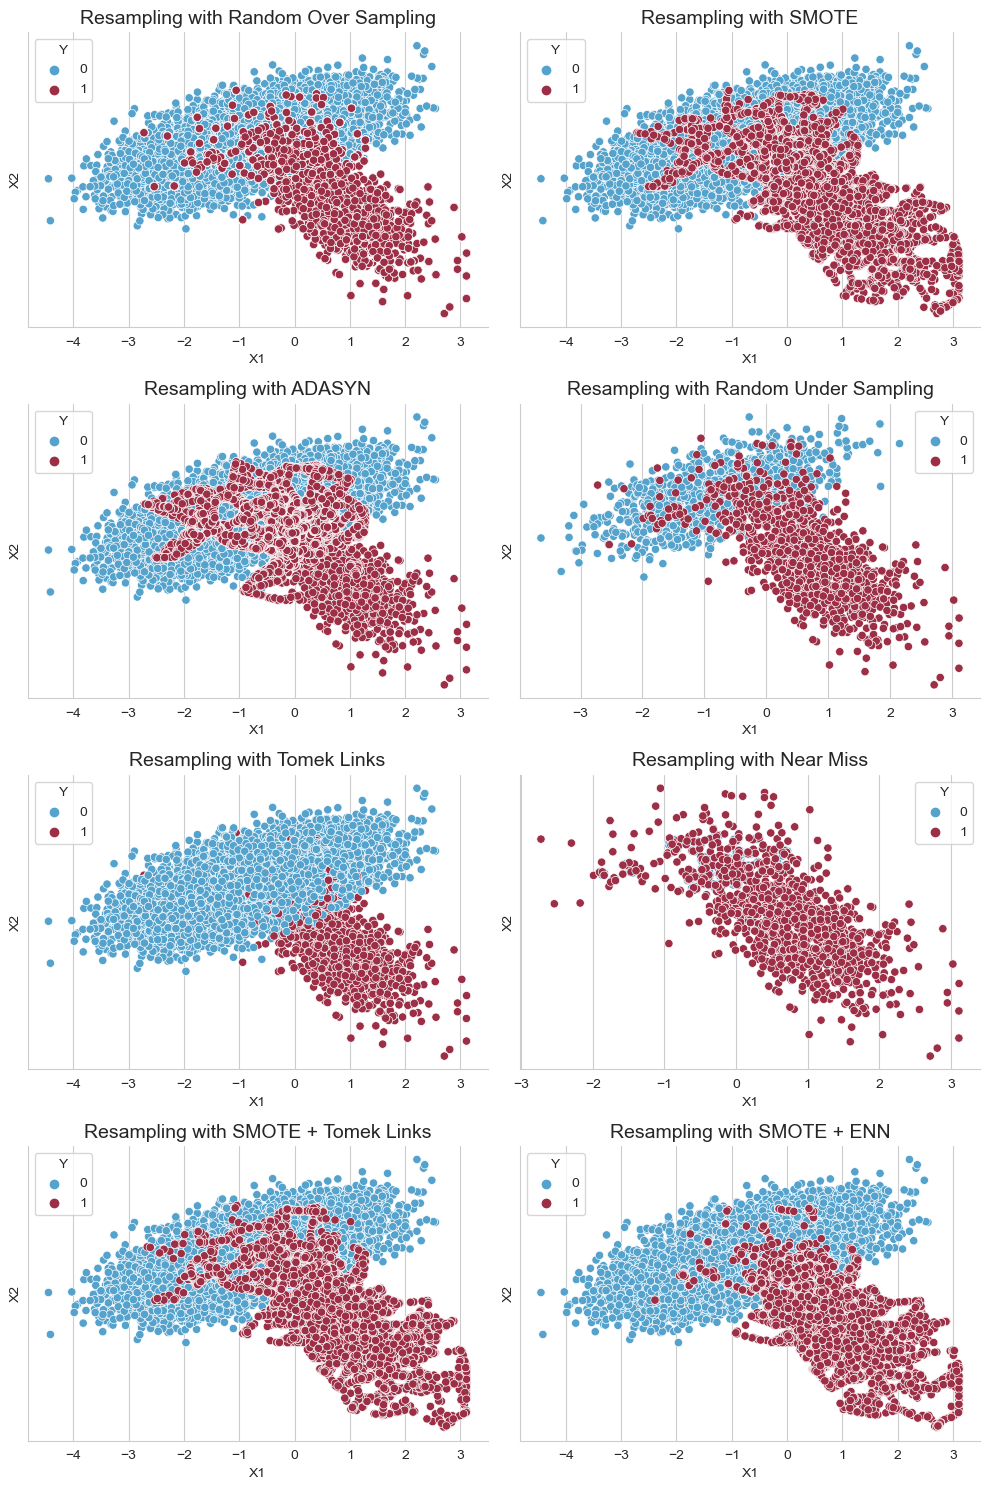

In [66]:
f, axes = plt.subplots(4,2,figsize=(10, 15), dpi=100)
sns.despine()
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_ros, ax=axes[0,0])
axes[0,0].set_title('Resampling with Random Over Sampling', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_sm, ax=axes[0,1])
axes[0,1].set_title('Resampling with SMOTE', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_ada, ax=axes[1,0])
axes[1,0].set_title('Resampling with ADASYN', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_rus, ax=axes[1,1])
axes[1,1].set_title('Resampling with Random Under Sampling', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_toml, ax=axes[2,0])
axes[2,0].set_title('Resampling with Tomek Links', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_nm, ax=axes[2,1])
axes[2,1].set_title('Resampling with Near Miss', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_smtom, ax=axes[3,0])
axes[3,0].set_title('Resampling with SMOTE + Tomek Links', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_smenn, ax=axes[3,1])
axes[3,1].set_title('Resampling with SMOTE + ENN', fontsize=14)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

# Building Models

In [73]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [75]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    plot_confusion_matrix(clf_model, X_test, y_test)  
    plt.show()
    #print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

# Model-1: Logistic Regression

### 1. Original Unsampled Data

In [76]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=0.04393970560760786)

Confusion Matrix


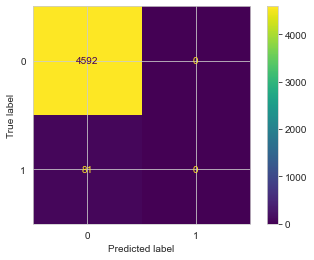

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4592
           1       0.00      0.00      0.00        81

    accuracy                           0.98      4673
   macro avg       0.49      0.50      0.50      4673
weighted avg       0.97      0.98      0.97      4673
 

AUC-ROC
0.7026108207510645


In [77]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

### 2. Random Over Resampling

In [78]:
clf_LR.fit(X_train_ros, y_train_ros)
clf_LR.best_estimator_

LogisticRegression(C=1.6378937069540613)

Confusion Matrix


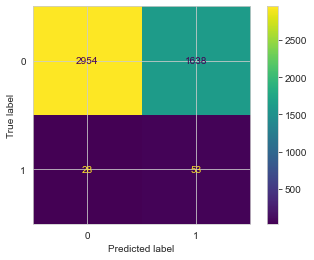

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      4592
           1       0.03      0.65      0.06        81

    accuracy                           0.64      4673
   macro avg       0.51      0.65      0.42      4673
weighted avg       0.97      0.64      0.77      4673
 

AUC-ROC
0.7019306254570482


In [79]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'random os')

### 3. SMOTE Resampling

In [80]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

LogisticRegression(C=1.6378937069540613)

Confusion Matrix


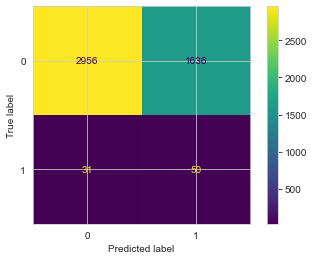

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      4592
           1       0.03      0.62      0.06        81

    accuracy                           0.64      4673
   macro avg       0.51      0.63      0.42      4673
weighted avg       0.97      0.64      0.77      4673
 

AUC-ROC
0.6850144642319439


In [81]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

### 4. ADASYN Resampling

In [82]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

LogisticRegression(C=1.6378937069540613)

Confusion Matrix


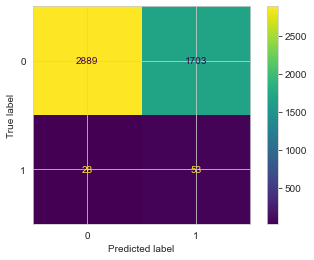

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      4592
           1       0.03      0.65      0.06        81

    accuracy                           0.63      4673
   macro avg       0.51      0.64      0.41      4673
weighted avg       0.97      0.63      0.76      4673
 

AUC-ROC
0.6888429152148665


In [83]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

### 5. Random Under Resampling

In [84]:
clf_LR.fit(X_train_rus, y_train_rus)
clf_LR.best_estimator_

LogisticRegression(C=10.0)

Confusion Matrix


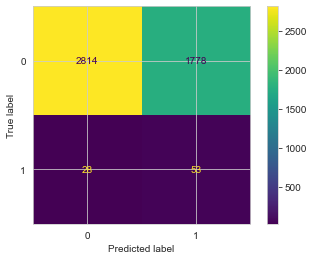

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.61      0.76      4592
           1       0.03      0.65      0.06        81

    accuracy                           0.61      4673
   macro avg       0.51      0.63      0.41      4673
weighted avg       0.97      0.61      0.74      4673
 

AUC-ROC
0.694730771712479


In [85]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'random us')

### 6. Tomek Links Resampling

In [86]:
clf_LR.fit(X_train_toml, y_train_toml)
clf_LR.best_estimator_

LogisticRegression(C=10.0)

Confusion Matrix


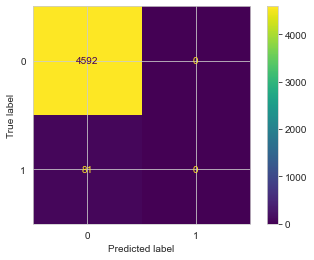

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4592
           1       0.00      0.00      0.00        81

    accuracy                           0.98      4673
   macro avg       0.49      0.50      0.50      4673
weighted avg       0.97      0.98      0.97      4673
 

AUC-ROC
0.6969514883640899


In [87]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'tomek links')

### 7. Near Miss Resampling

In [88]:
clf_LR.fit(X_train_nm, y_train_nm)
clf_LR.best_estimator_

LogisticRegression(C=0.04393970560760786)

Confusion Matrix


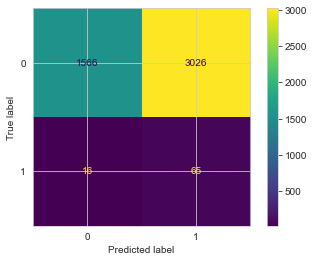

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.34      0.51      4592
           1       0.02      0.80      0.04        81

    accuracy                           0.35      4673
   macro avg       0.51      0.57      0.27      4673
weighted avg       0.97      0.35      0.50      4673
 

AUC-ROC
0.6174519830515766


In [89]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'near miss')

### 8. SMOTE + Tomek Resampling

In [90]:
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

LogisticRegression(C=10.0)

Confusion Matrix


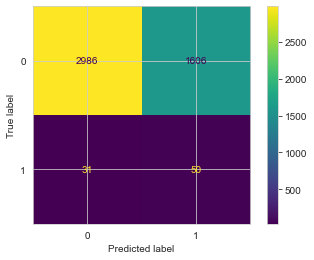

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.65      0.78      4592
           1       0.03      0.62      0.06        81

    accuracy                           0.65      4673
   macro avg       0.51      0.63      0.42      4673
weighted avg       0.97      0.65      0.77      4673
 

AUC-ROC
0.6828286983266658


In [91]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+tomek')

### 9. SMOTE + ENN Resampling

In [92]:
clf_LR.fit(X_train_smenn, y_train_smenn)
clf_LR.best_estimator_

LogisticRegression(C=10.0, class_weight='balanced')

Confusion Matrix


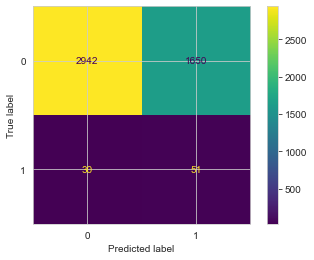

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      4592
           1       0.03      0.63      0.06        81

    accuracy                           0.64      4673
   macro avg       0.51      0.64      0.42      4673
weighted avg       0.97      0.64      0.77      4673
 

AUC-ROC
0.6859151180797523


In [93]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+enn')

# Model-2: Decision Tree

In [94]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

### 1. Original Unsampled Data

In [95]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=100)

Confusion Matrix


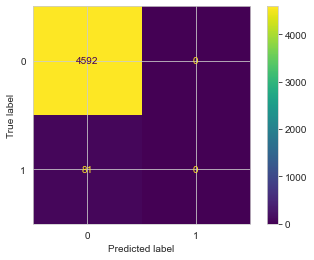

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4592
           1       0.00      0.00      0.00        81

    accuracy                           0.98      4673
   macro avg       0.49      0.50      0.50      4673
weighted avg       0.97      0.98      0.97      4673
 

AUC-ROC
0.7112772615821397


In [96]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

### 2. Random Over Resampling

In [97]:
clf_DT.fit(X_train_ros, y_train_ros)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10)

Confusion Matrix


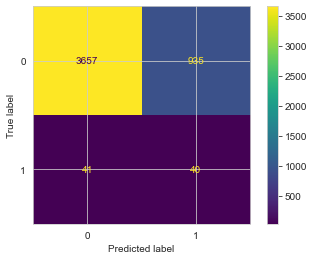

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      4592
           1       0.04      0.49      0.08        81

    accuracy                           0.79      4673
   macro avg       0.51      0.65      0.48      4673
weighted avg       0.97      0.79      0.87      4673
 

AUC-ROC
0.6763171054329592


In [98]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'random os')

### 3. SMOTE Resampling

In [99]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.5s finished


DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=15)

Confusion Matrix


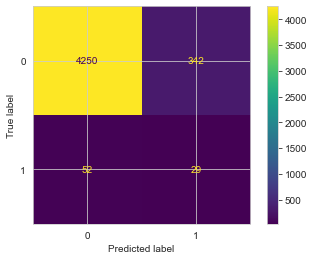

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4592
           1       0.08      0.36      0.13        81

    accuracy                           0.92      4673
   macro avg       0.53      0.64      0.54      4673
weighted avg       0.97      0.92      0.94      4673
 

AUC-ROC
0.700640136361681


In [100]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

### 4. ADASYN Resampling

In [101]:
clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=15)

Confusion Matrix


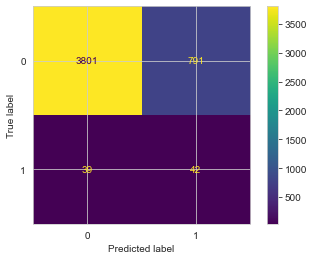

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      4592
           1       0.05      0.52      0.09        81

    accuracy                           0.82      4673
   macro avg       0.52      0.67      0.50      4673
weighted avg       0.97      0.82      0.89      4673
 

AUC-ROC
0.7040720307996732


In [102]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

### 5. Random Under Resampling

In [103]:
clf_DT.fit(X_train_rus, y_train_rus)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10)

Confusion Matrix


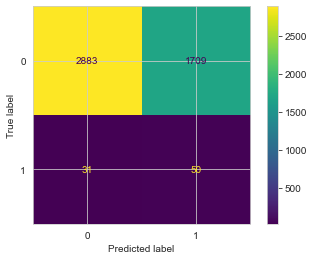

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      4592
           1       0.03      0.62      0.05        81

    accuracy                           0.63      4673
   macro avg       0.51      0.62      0.41      4673
weighted avg       0.97      0.63      0.76      4673
 

AUC-ROC
0.6510544371316729


In [104]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'random us')

### 6. Tomek Links Resampling

In [105]:
clf_DT.fit(X_train_toml, y_train_toml)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished


DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=100)

Confusion Matrix


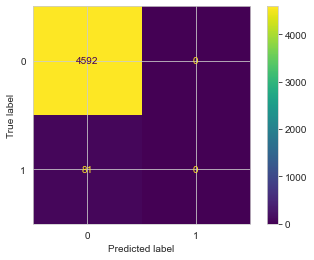

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4592
           1       0.00      0.00      0.00        81

    accuracy                           0.98      4673
   macro avg       0.49      0.50      0.50      4673
weighted avg       0.97      0.98      0.97      4673
 

AUC-ROC
0.6931552996085517


In [106]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'tomek links')

### 7. Near Miss Resampling

In [107]:
clf_DT.fit(X_train_nm, y_train_nm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=50)

Confusion Matrix


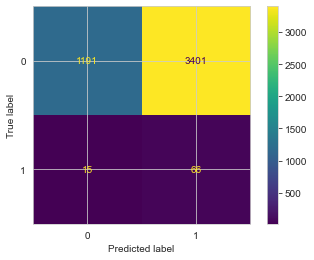

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.26      0.41      4592
           1       0.02      0.81      0.04        81

    accuracy                           0.27      4673
   macro avg       0.50      0.54      0.22      4673
weighted avg       0.97      0.27      0.40      4673
 

AUC-ROC
0.48569170215511687


In [108]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'near miss')

### 8. SMOTE + Tomek Resampling

In [109]:
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.9s finished


DecisionTreeClassifier(max_depth=15, min_samples_split=5)

Confusion Matrix


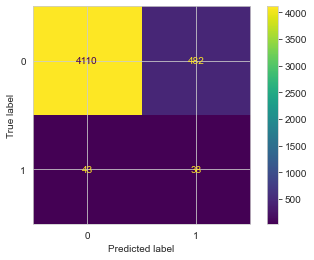

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4592
           1       0.07      0.47      0.13        81

    accuracy                           0.89      4673
   macro avg       0.53      0.68      0.53      4673
weighted avg       0.97      0.89      0.93      4673
 

AUC-ROC
0.7019050845270357


In [110]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+tomek')

### 9. SMOTE + ENN Resampling

In [111]:
clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.3s finished


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=15)

Confusion Matrix


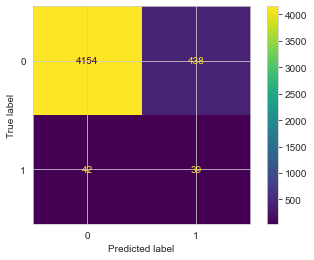

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      4592
           1       0.08      0.48      0.14        81

    accuracy                           0.90      4673
   macro avg       0.54      0.69      0.54      4673
weighted avg       0.97      0.90      0.93      4673
 

AUC-ROC
0.711862014453478


In [112]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+enn')

# Model-3: Random Forest

### 1. Original Unsampled Data

In [113]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.8s finished


RandomForestClassifier(max_depth=11, n_estimators=50)

Confusion Matrix


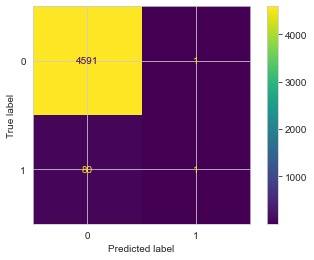

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4592
           1       0.50      0.01      0.02        81

    accuracy                           0.98      4673
   macro avg       0.74      0.51      0.51      4673
weighted avg       0.97      0.98      0.97      4673
 

AUC-ROC
0.7992375360261539


In [114]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

### 2. Random Over Resampling

In [115]:
clf_RF.fit(X_train_ros, y_train_ros)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.6s finished


RandomForestClassifier(max_depth=15, n_estimators=50)

Confusion Matrix


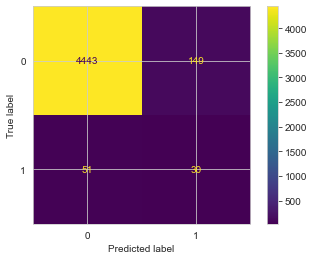

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4592
           1       0.17      0.37      0.23        81

    accuracy                           0.96      4673
   macro avg       0.58      0.67      0.60      4673
weighted avg       0.97      0.96      0.97      4673
 

AUC-ROC
0.7527611089602959


In [116]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'random os')

### 3. SMOTE Resampling

In [117]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   58.0s finished


RandomForestClassifier(max_depth=15)

Confusion Matrix


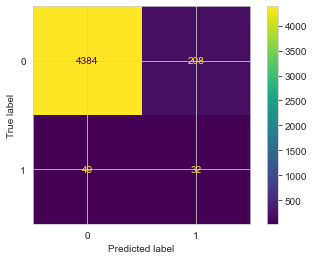

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4592
           1       0.13      0.40      0.20        81

    accuracy                           0.95      4673
   macro avg       0.56      0.67      0.59      4673
weighted avg       0.97      0.95      0.96      4673
 

AUC-ROC
0.7558676926054975


In [118]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

### 4. ADASYN Resampling

In [119]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.6s finished


RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=50)

Confusion Matrix


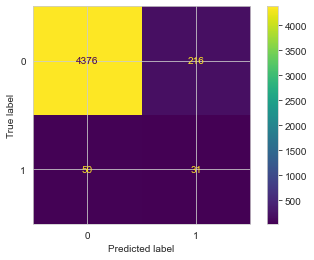

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4592
           1       0.13      0.38      0.19        81

    accuracy                           0.94      4673
   macro avg       0.56      0.67      0.58      4673
weighted avg       0.97      0.94      0.96      4673
 

AUC-ROC
0.7610000752785305


In [120]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

### 5. Random Under Resampling

In [121]:
clf_RF.fit(X_train_rus, y_train_rus)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


RandomForestClassifier(max_depth=9, n_estimators=50)

Confusion Matrix


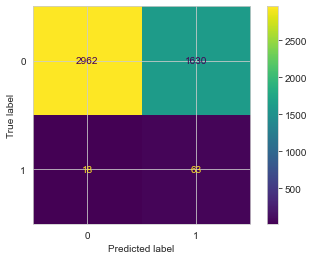

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.65      0.78      4592
           1       0.04      0.78      0.07        81

    accuracy                           0.65      4673
   macro avg       0.52      0.71      0.43      4673
weighted avg       0.98      0.65      0.77      4673
 

AUC-ROC
0.7955703961801524


In [122]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'random us')

### 6. Tomek Links Resampling

In [123]:
clf_RF.fit(X_train_toml, y_train_toml)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.5s finished


RandomForestClassifier(max_depth=11, min_samples_split=10)

Confusion Matrix


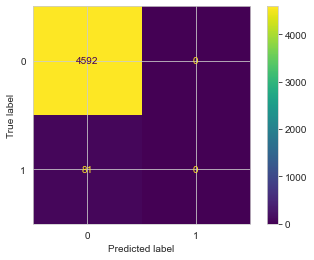

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4592
           1       0.00      0.00      0.00        81

    accuracy                           0.98      4673
   macro avg       0.49      0.50      0.50      4673
weighted avg       0.97      0.98      0.97      4673
 

AUC-ROC
0.8364063104916764


In [124]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'tomek links')

### 7. Near Miss Resampling

In [125]:
clf_RF.fit(X_train_nm, y_train_nm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=50)

Confusion Matrix


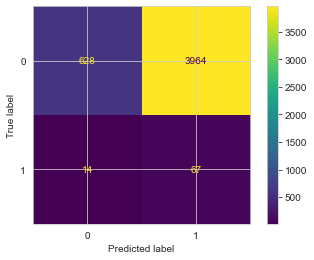

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.14      0.24      4592
           1       0.02      0.83      0.03        81

    accuracy                           0.15      4673
   macro avg       0.50      0.48      0.14      4673
weighted avg       0.96      0.15      0.24      4673
 

AUC-ROC
0.5546091968856196


In [126]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'near miss')

### 8. SMOTE + Tomek Resampling

In [127]:
clf_RF.fit(X_train_smtom, y_train_smtom)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.9s finished


RandomForestClassifier(max_depth=15, min_samples_split=15)

Confusion Matrix


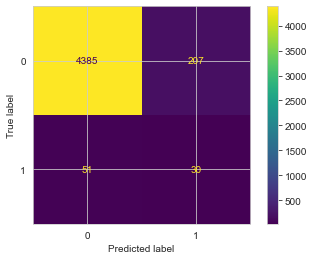

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4592
           1       0.13      0.37      0.19        81

    accuracy                           0.94      4673
   macro avg       0.56      0.66      0.58      4673
weighted avg       0.97      0.94      0.96      4673
 

AUC-ROC
0.7662373101905622


In [128]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+tomek')

### 9. SMOTE + ENN Resampling

In [129]:
clf_RF.fit(X_train_smenn, y_train_smenn)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.5s finished


RandomForestClassifier(max_depth=13)

Confusion Matrix


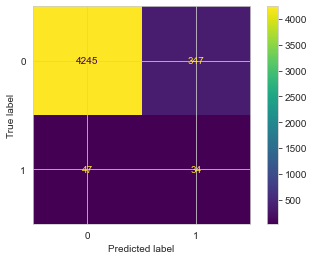

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      4592
           1       0.09      0.42      0.15        81

    accuracy                           0.92      4673
   macro avg       0.54      0.67      0.55      4673
weighted avg       0.97      0.92      0.94      4673
 

AUC-ROC
0.7509423258915129


In [130]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+enn')

# Comparitive Analysis

In [131]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [132]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.000000,0.000000,0.000000,0.702611
1,Logistic Regression,random os,0.031342,0.654321,0.059819,0.701931
2,Logistic Regression,smote,0.029656,0.617284,0.056593,0.685014
3,Logistic Regression,adasyn,0.030182,0.654321,0.057703,0.688843
4,Logistic Regression,random us,0.028946,0.654321,0.055439,0.694731
5,Logistic Regression,tomek links,0.000000,0.000000,0.000000,0.696951
6,Logistic Regression,near miss,0.021029,0.802469,0.040984,0.617452
7,Logistic Regression,smote+tomek,0.030193,0.617284,0.057571,0.682829
8,Logistic Regression,smote+enn,0.029982,0.629630,0.057239,0.685915
9,Decision Tree,actual,0.000000,0.000000,0.000000,0.711277


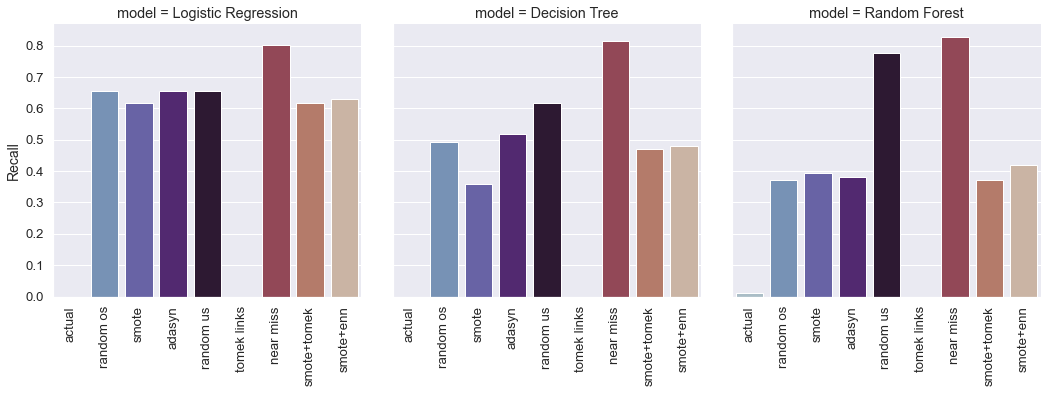

In [133]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "random os", "smote", "adasyn", "random us", "tomek links", "near miss", "smote+tomek", "smote+enn"])
g.set_xticklabels(rotation=90)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)